<a href="https://colab.research.google.com/github/SKM1978/Transfer-Learning/blob/master/Identifying_Disease_type_in_Tomato_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

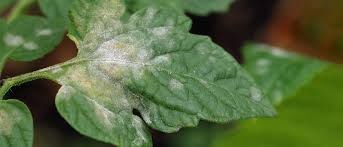

## The objective is to understand which type of disease does a tomato plant has, by viewing the image of the condition of its leaves. There are six different types of diseases that have been identified.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, GlobalAveragePooling2D, Conv2D, BatchNormalization

from tensorflow.keras.applications.resnet50 import preprocess_input

## Uploading the dataset

In [2]:
# Resizing all images

IMAGE_SIZE=[224,224]


# Path to train and test images

train_path='/content/drive/MyDrive/Tomato Leaf Disease/Train'
test_path='/content/drive/MyDrive/Tomato Leaf Disease/Test'

#### Bacterial Spot
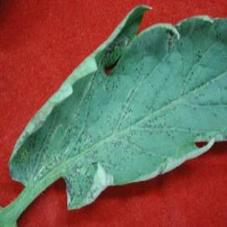

#### Black Mold
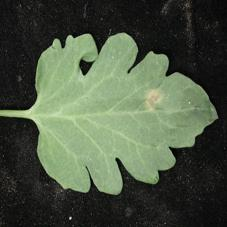

#### Gray Spot
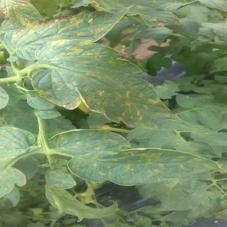

#### Late Blight
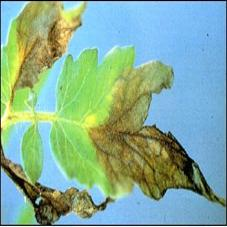

#### Health
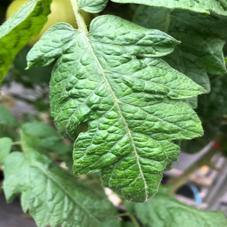

#### Powdery Mildew
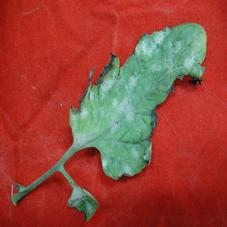

## Transfer Learning with VGG16 model

In [3]:
vggnet=tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE+[3])

# Using vggnet model only for feature extraction and not for learning, by freezing all the layers that we don't need
for layer in vggnet.layers:
  layer.trainable=False

# Taking the output of the base layers
vggnet_output=vggnet.output

# Adding our own layers

## Pool Layer
x=GlobalAveragePooling2D()(vggnet_output)

## Flatten Layer
x=Flatten()(x)

## Batch Normalization
x=BatchNormalization()(x)

## Fully connected Layer
x=Dense(512, activation='relu')(x)

## Batch Normalization
x=BatchNormalization()(x)

## Dropout Layer
x=Dropout(0.3)(x)

## Batch Normalization
x=BatchNormalization()(x)

## Outer Layer
x=Dense(6, activation='softmax')(x)

58900480/58889256 [==============================] - 1s 0us/step


In [4]:
# Initializing the vggnet model

vgg_model=Model(inputs=vggnet.input, outputs=x)

vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Image Generator and Augmentation

In [6]:
# Using the ImageDataGenerator to import images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen=ImageDataGenerator(rescale=1/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
testing_datagen=ImageDataGenerator(rescale=1/255.0)

In [7]:
# Make sure you provide the same target size as initialied for the image size

train_set=training_datagen.flow_from_directory('/content/drive/MyDrive/Tomato Leaf Disease/Train', target_size=(224,224), class_mode='categorical', batch_size=32)
test_set=testing_datagen.flow_from_directory('/content/drive/MyDrive/Tomato Leaf Disease/Test', target_size=(224,224), class_mode='categorical', batch_size=32)

Found 3978 images belonging to 6 classes.
Found 998 images belonging to 6 classes.


## Fitting the VGG model

In [8]:
vgg_result=vgg_model.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
125/125 [==============================] - 1075s 8s/step - loss: 1.0370 - accuracy: 0.6445 - val_loss: 1.3128 - val_accuracy: 0.5762
Epoch 2/20
125/125 [==============================] - 72s 573ms/step - loss: 0.6188 - accuracy: 0.7662 - val_loss: 0.8338 - val_accuracy: 0.7525
Epoch 3/20
125/125 [==============================] - 66s 526ms/step - loss: 0.4972 - accuracy: 0.8115 - val_loss: 0.5434 - val_accuracy: 0.8126
Epoch 4/20
125/125 [==============================] - 67s 536ms/step - loss: 0.4236 - accuracy: 0.8431 - val_loss: 0.3624 - val_accuracy: 0.8928
Epoch 5/20
125/125 [==============================] - 68s 544ms/step - loss: 0.3837 - accuracy: 0.8655 - val_loss: 0.2887 - val_accuracy: 0.9078
Epoch 6/20
125/125 [==============================] - 67s 532ms/step - loss: 0.3585 - accuracy: 0.8705 - val_loss: 0.2331 - val_accuracy: 0.9228
Epoch 7/20
125/125 [==============================] - 67s 532ms/step - loss: 0.3275 - accuracy: 0.8856 - val_loss: 0.2280 - val_acc

## Evaluating the model

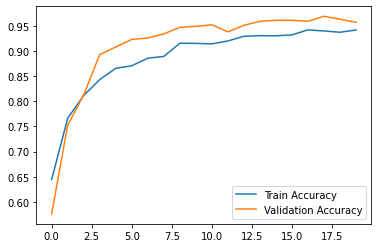

In [9]:
# plot the accuracy
plt.plot(vgg_result.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### The model is predicting the disease type with 95% accuracy

## Predicting with the model

In [14]:
y_pred=vgg_model.predict(test_set)
y_pred=np.argmax(y_pred, axis=1)
y_pred

array([5, 3, 0, 4, 5, 3, 5, 5, 4, 5, 1, 4, 4, 0, 2, 5, 0, 0, 4, 1, 5, 0,
       5, 5, 4, 5, 3, 4, 5, 4, 0, 5, 5, 0, 0, 3, 3, 0, 5, 3, 0, 3, 3, 3,
       2, 3, 0, 4, 4, 0, 5, 0, 5, 3, 4, 1, 5, 0, 3, 3, 2, 1, 4, 0, 0, 0,
       5, 3, 2, 3, 1, 5, 4, 5, 5, 0, 5, 5, 0, 2, 2, 2, 3, 4, 2, 3, 2, 5,
       4, 3, 2, 0, 1, 2, 1, 5, 1, 2, 5, 4, 3, 5, 4, 2, 5, 3, 5, 3, 0, 2,
       4, 1, 5, 5, 3, 2, 3, 1, 5, 4, 1, 1, 0, 1, 0, 3, 2, 5, 2, 5, 2, 0,
       1, 4, 0, 0, 3, 5, 4, 5, 5, 4, 3, 2, 4, 1, 5, 0, 1, 0, 4, 0, 1, 2,
       4, 0, 4, 1, 1, 3, 2, 1, 4, 2, 0, 2, 2, 5, 0, 5, 5, 2, 3, 5, 5, 5,
       0, 3, 2, 4, 1, 2, 5, 5, 2, 5, 3, 4, 5, 5, 0, 4, 5, 1, 4, 0, 4, 5,
       5, 4, 4, 2, 5, 2, 1, 0, 3, 0, 0, 2, 1, 2, 2, 0, 4, 2, 1, 2, 1, 5,
       3, 4, 2, 4, 2, 3, 4, 5, 1, 4, 0, 0, 3, 5, 5, 3, 1, 4, 5, 5, 5, 5,
       3, 5, 0, 2, 4, 5, 5, 0, 3, 4, 0, 3, 5, 3, 1, 4, 5, 3, 3, 3, 1, 0,
       5, 5, 5, 0, 1, 0, 3, 1, 4, 0, 0, 2, 0, 4, 3, 0, 4, 4, 3, 5, 5, 5,
       1, 3, 0, 0, 5, 2, 5, 5, 1, 5, 1, 5, 2, 3, 0,

## Saving the model

In [15]:
# serialize model to JSON
tomato_desease_predictor_model_json = vgg_model.to_json()
with open("tomato_desease_predictor_model.json", "w") as json_file:
    json_file.write(tomato_desease_predictor_model_json)
# serialize weights to HDF5
vgg_model.save_weights("tomato_desease_predictor_model.h5")
print("Saved model to disk")

Saved model to disk


## Re-using the same model

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# load json and create model
model = open('tomato_desease_predictor_model.json', 'r')
loaded_model_json = model.read()
model.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("tomato_desease_predictor_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [19]:
model=load_model('tomato_leaf_disease_predictor.h5')

## Predicting an adhoc image with the model

In [31]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions

# load an image from file
image = load_img('/content/drive/MyDrive/Tomato Leaf Disease/Train/powdery mildew/pm101_mirror_vertical.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
y_predict = model.predict(image)
y_predict

# convert the probabilities to class labels
# label = decode_predictions(y_predict)

# retrieve the most likely result, e.g. highest probability
# label = label[0][0]

# print the classification
# print('%s (%.2f%%)' % (label[1], label[2]*100))



array([[0.        , 0.        , 0.9936837 , 0.        , 0.        ,
        0.00631638]], dtype=float32)